In [1]:
import control
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
s = control.tf([1, 0], [0, 1])

In [2]:
G = 1000*(s + 1)/((s + 20 + 20j)*(s + 20 - 20j))
H = 0.12*(s+50)/(s*(s+1))
Go = control.minreal(G*H, 1e-3)
Go

1 states have been removed from the model


/home/gupta301/anaconda3/envs/aae497-f19/lib/python3.7/site-packages/control/xferfcn.py:896: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, np + 1 - len(numpoly):np + 1] = numpoly[::-1]



    120 s + 6000
--------------------
s^3 + 40 s^2 + 800 s

[-2, 0, -1, 1]

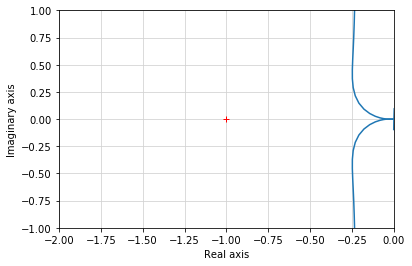

In [3]:
control.nyquist(Go);
plt.axis([-2, 0, -1, 1])

/home/gupta301/anaconda3/envs/aae497-f19/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/gupta301/anaconda3/envs/aae497-f19/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


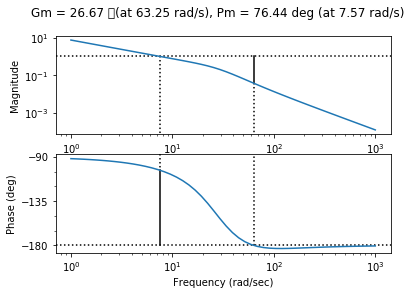

In [4]:
control.bode(Go, margins=True, Hz=False);

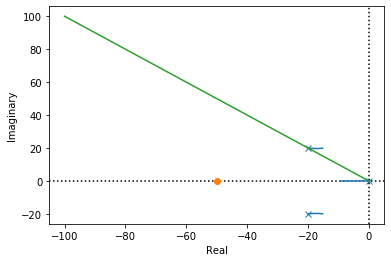

In [5]:
control.rlocus(Go, kvect=np.linspace(0, 1));
plt.plot([0, -100], [0, 100])

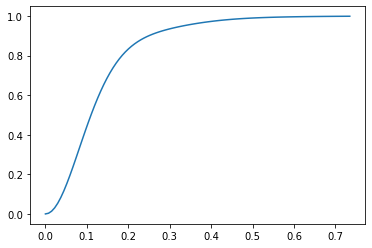

In [6]:
Gc = control.feedback(Go)
t, y = control.step_response(Gc)
plt.plot(t, y)

In [7]:
H


0.12 s + 6
----------
  s^2 + s

In [8]:
Hd = control.tf2ss(control.c2d(H, 0.01))
Hd

A = [[ 1.99004983e+00  9.90049834e-01]
 [-1.00000000e+00  2.22044605e-16]]

B = [[-1.]
 [ 0.]]

C = [[-0.00149302 -0.00089601]]

D = [[0.]]

dt = 0.01

$x[k+1] = A x[k] + B u[k]$

$y[k] = C x[k] + D u[k]$

In [9]:
x = ca.SX.sym('x', 2)
u = ca.SX.sym('u', 1)
x1 = ca.mtimes(Hd.A, x) + ca.mtimes(Hd.B, u)
y = ca.mtimes(Hd.C, x) + ca.mtimes(Hd.D, u)

f_control = ca.Function('control', [x, u], [x1, y], ['x', 'u'], ['x1', 'y'])
f_control

Function(control:(x[2],u)->(x1[2],y) SXFunction)